In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

# add the path to my packages to system paths so they can be imported
import sys
sys.path.append('/home/yasamanparhizkar/Documents/yorku/01_thesis/code/my_packages')
# sys.path.append('F:\MAScThesis\code\my_packages')
# sys.path.append('/home/yasamanparhizkar/Documents/thesis/code/my_packages')

import data_handler_03 as dh
import my_simgraph_06 as sg
import assess_simgraph_02 as asg

# Compare two different sets of parameters in the similarity graph model
**First set:** Dt=None, Dv=0, Dvt=2000
<br>
**Second set:** Dt=50, Dv=0, Dvt=26

## runtime

In [2]:
def load_runtime_curves_errors(res_path, num):
    for i in range(num):
        curves_i = np.loadtxt(res_path+'curves/runtime_'+str(i)+'.txt')
        if i==0:
            curves = curves_i[::2].reshape((1, -1))
            errors = curves_i[1::2].reshape((1, -1))
        else:
            curves = np.concatenate((curves, [curves_i[::2]]), axis=0)
            errors = np.concatenate((errors, [curves_i[1::2]]), axis=0)
            
    return curves, errors

In [3]:
res_path = '../../data/experiments/slowfast/slowfast_sg/2023_04_05-runtime-n/'
train_sizes = [50, 100, 150, 200, 250, 300]
val_sizes =  [10]
train_its = 50
val_its = 1

# graph construction and penalty term parameters
sg_params_n = {'mu': 30, 'Dt': 50, 'Dv':0, 'Dvt':26, \
             'cnstr_method_tt': 'time', 'cnstr_method_vv': 'time', 'cnstr_method_vt': 'time',\
             'train_t': None, 'val_t': None, \
             'edges_tt':None, 'edges_vv':None, 'edges_vt':None, }

# read runtime curves
curves_n, errors_n = load_runtime_curves_errors(res_path, len(val_sizes))

In [4]:
res_path = '../../data/experiments/slowfast/slowfast_sg/2023_04_05-runtime-n2/'

# graph construction and penalty term parameters
sg_params_n2 = {'mu': 30, 'Dt': None, 'Dv':0, 'Dvt':2000, \
             'cnstr_method_tt': 'time', 'cnstr_method_vv': 'time', 'cnstr_method_vt': 'time',\
             'train_t': None, 'val_t': None, \
             'edges_tt':None, 'edges_vv':None, 'edges_vt':None, }

# read runtime curves
curves_n2, errors_n2 = load_runtime_curves_errors(res_path, len(val_sizes))

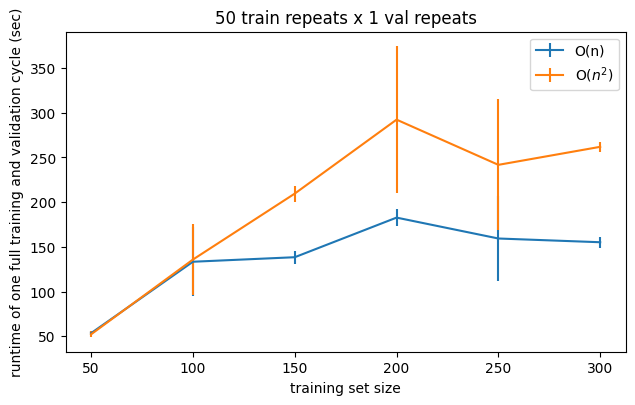

In [5]:
res_path = '../../data/experiments/comparison/2023_04_05-sg-full-maxdeg/'
# plot runtime curves
plt.figure(figsize=(7, 4))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.8)
for i in range(len(val_sizes)):
    plt.subplot(len(val_sizes), 1, i+1)
    plt.errorbar(train_sizes, curves_n[i], errors_n[i])
    plt.errorbar(train_sizes, curves_n2[i], errors_n2[i])
    plt.legend(['O(n)', 'O($n^2$)'])
    plt.xlabel('training set size')
    plt.ylabel('runtime of one full training and validation cycle (sec)')
    plt.title('{} train repeats x {} val repeats'.format(train_its, val_its))
plt.savefig(res_path+'runtime_curves.png')
# plt.close()

## accuracy

In [6]:
def load_train_curves_errors(res_path, num, assess_qs):
    curves = {}
    errors = {}
    for i in range(num):
        curves_i = np.loadtxt(res_path+'curves/train_'+str(i)+'.txt')
        j = 0
        for quantity in assess_qs:
            if i==0:
                curves[quantity] = curves_i[j::8].reshape((1, -1))
                errors[quantity] = curves_i[j+1::8].reshape((1, -1))
            else:
                curves[quantity] = np.concatenate((curves[quantity], [curves_i[j::8]]), axis=0)
                errors[quantity] = np.concatenate((errors[quantity], [curves_i[j+1::8]]), axis=0)
            j += 2
            
    return curves, errors

In [25]:
assess_qs = ['min_acc', 'val_acc', 'missed', 'false_alarm']
res_path = '../../data/experiments/slowfast/slowfast_sg/2023_04_05-runtime-n/'
# read runtime curves
curves_n, errors_n = load_train_curves_errors(res_path, len(val_sizes), assess_qs)

In [8]:
res_path = '../../data/experiments/slowfast/slowfast_sg/2023_04_05-runtime-n2/'

# read runtime curves
curves_n2, errors_n2 = load_train_curves_errors(res_path, len(val_sizes), assess_qs)

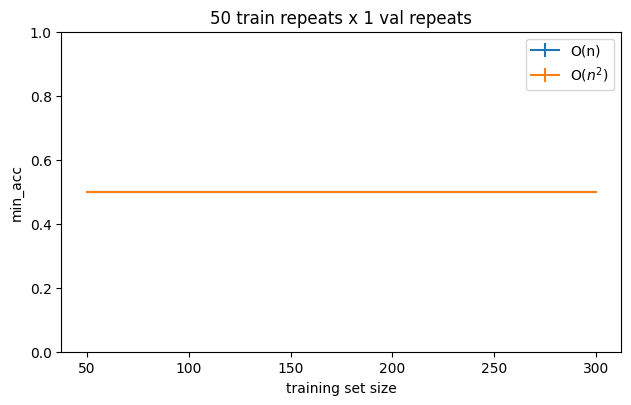

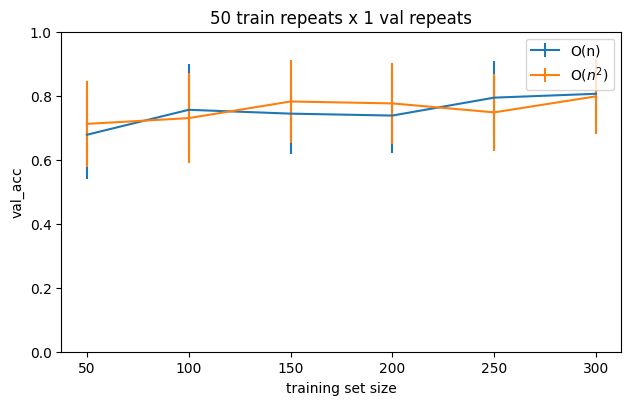

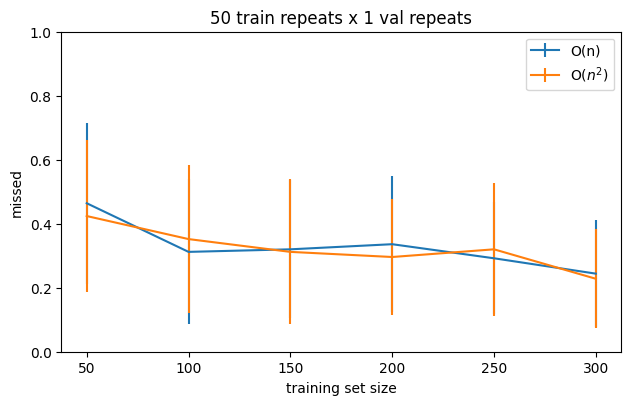

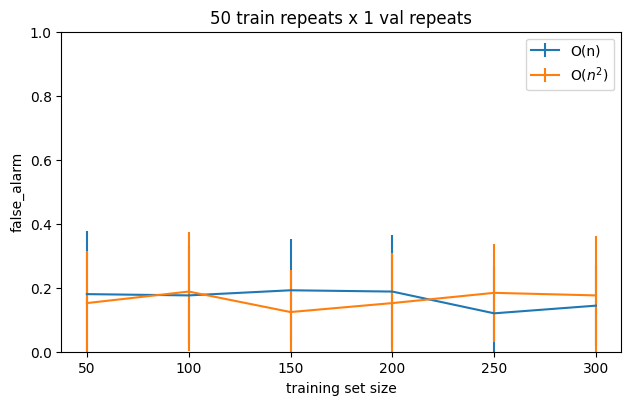

In [11]:
res_path = '../../data/experiments/comparison/2023_04_05-sg-full-maxdeg/'
# plot training curves
for quantity in assess_qs:
    plt.figure(figsize=(7, 4))
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.8)
    for i in range(len(val_sizes)):
        plt.subplot(len(val_sizes), 1, i+1)
        plt.errorbar(train_sizes, curves_n[quantity][i], errors_n[quantity][i])
        plt.errorbar(train_sizes, curves_n2[quantity][i], errors_n2[quantity][i])
        plt.ylim([0,1])
        plt.legend(['O(n)', 'O($n^2$)'])
        plt.xlabel('training set size')
        plt.ylabel(quantity)
        plt.title('{} train repeats x {} val repeats'.format(train_its, val_its))
    plt.savefig(res_path+quantity+'_curves.png')
    # plt.close()

# Compare time-based and random edge choice policies

In [18]:
res_path = '../../data/experiments/slowfast/slowfast_sg/2023_04_02/mu_30/'
train_sizes = [50, 100, 150, 200, 250, 300]
val_sizes =  [10]
train_its = 5
val_its = 10

# graph construction and penalty term parameters
sg_params_sg = {'mu': 30, 'Dt': 50, 'Dv':0, 'Dvt':26, \
             'cnstr_method_tt': 'random', 'cnstr_method_vv': 'random', 'cnstr_method_vt': 'random',\
             'train_t': None, 'val_t': None, \
             'edges_tt':None, 'edges_vv':None, 'edges_vt':None, }

curves_sg = {}
errors_sg = {}
for i in range(len(val_sizes)):
    curves_i = np.loadtxt(res_path+'curves_'+str(i)+'.txt').reshape((8,-1))
    j = 0
    for quantity in assess_qs:
        if i==0:
            curves_sg[quantity] = curves_i[j, :].reshape((1, -1))
            errors_sg[quantity] = curves_i[j+1, :].reshape((1, -1))
        else:
            curves_sg[quantity] = np.concatenate((curves_sg[quantity], [curves_i[j,:]]), axis=0)
            errors_sg[quantity] = np.concatenate((errors_sg[quantity], [curves_i[j+1,:]]), axis=0)
        j += 2

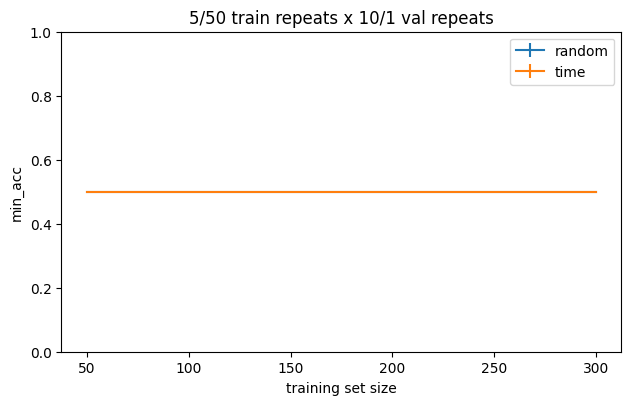

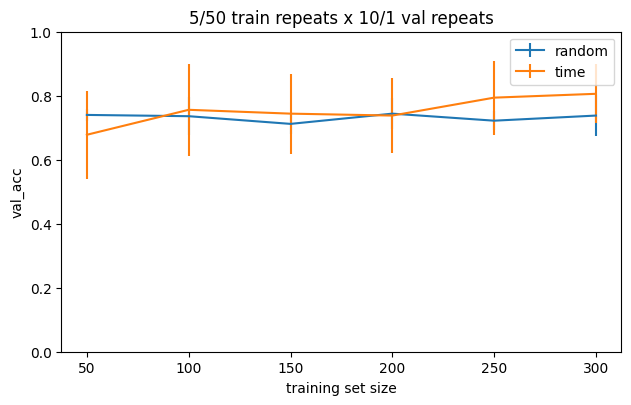

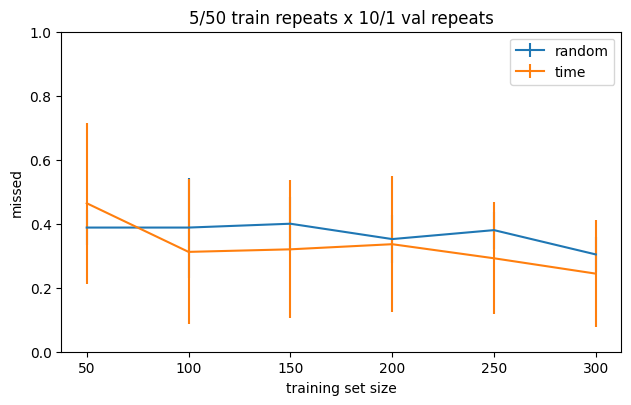

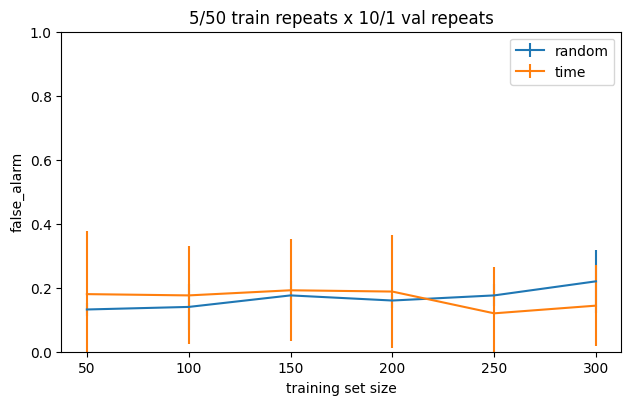

In [27]:
res_path = '../../data/experiments/comparison/2023_04_05-sg-sgt/'
# plot training curves
for quantity in assess_qs:
    plt.figure(figsize=(7, 4))
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.8)
    for i in range(len(val_sizes)):
        plt.subplot(len(val_sizes), 1, i+1)
        plt.errorbar(train_sizes, curves_sg[quantity][i], errors_sg[quantity][i])
        plt.errorbar(train_sizes, curves_n[quantity][i], errors_n[quantity][i])
        plt.ylim([0,1])
        plt.legend(['random', 'time'])
        plt.xlabel('training set size')
        plt.ylabel(quantity)
        plt.title('5/50 train repeats x 10/1 val repeats')
    plt.savefig(res_path+quantity+'_curves.png')
    # plt.close()